In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
# Define features (X) and target (y)
X = df[['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']]
y = df['label']


In [6]:
# Split the data into training and testing sets (1800 for training, the rest for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1800, random_state=42)


In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the testing data
X_test_scaled = scaler.transform(X_test)


In [9]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Output message when training is completed
print("Training is complete.")


Training is complete.


In [20]:
# Compare expected vs. predicted for the first 10 test samples
comparison = pd.DataFrame({'Expected': y_test[:10].values, 'Predicted': y_pred[:10]})
print(comparison)



     Expected   Predicted
0   muskmelon   muskmelon
1  watermelon  watermelon
2      papaya      papaya
3      papaya      papaya
4       apple       apple
5       mango       mango
6       apple       apple
7   mothbeans   mothbeans
8    mungbean    mungbean
9      lentil      lentil


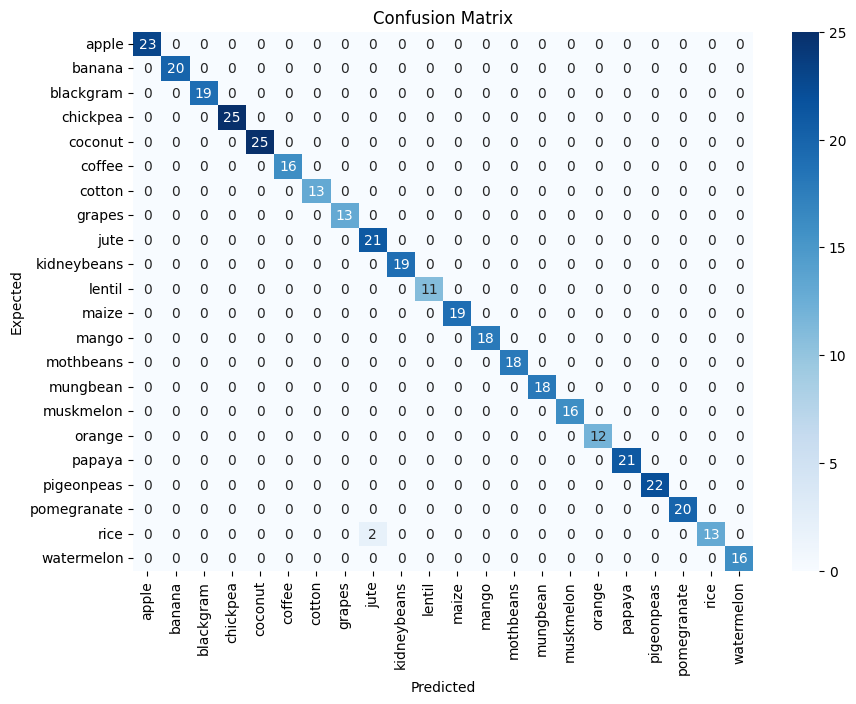

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix')
plt.show()



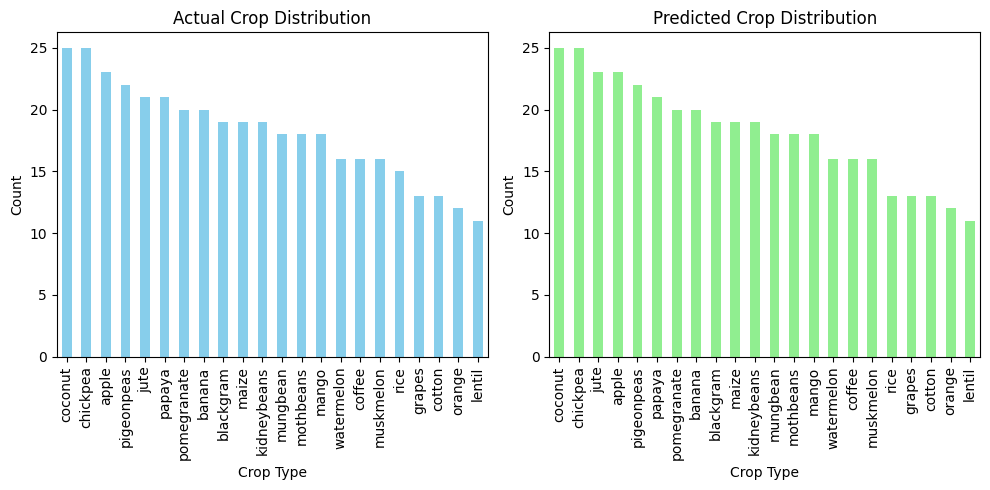

In [22]:
# Visualize actual vs predicted labels count
plt.figure(figsize=(10, 5))

# Plot actual values count
plt.subplot(1, 2, 1)
y_test.value_counts().plot(kind='bar', color='skyblue')
plt.title('Actual Crop Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')

# Plot predicted values count
plt.subplot(1, 2, 2)
pd.Series(y_pred).value_counts().plot(kind='bar', color='lightgreen')
plt.title('Predicted Crop Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model using grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_s

In [24]:
# Train the model with best parameters
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_final = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy*100:.2f}%")


Final Model Accuracy: 99.50%
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split

In [25]:
import joblib
joblib.dump(best_model, 'best_model.pkl')
loaded_model = joblib.load('best_model.pkl')
